
# Структура проекта
1. [Изучение данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Баланс классов](#balance)
4. [Построение моделей](#models)
5. [Вывод](#conclusion)

# Отток клиентов

## 1.Изучение данных
<a id="start"></a>

На данном этапе:
- импортируем библиотеки,
- откроем файл с данными и изучим его.

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as scikit_learn
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Откроем файл с данными.

In [2]:
data = pd.read_csv('Churn.csv')

Изучим файл, посмотрим первые 10 строк датафрейма.

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

Изучим общую информацию.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В результате анализа данных замечаем, что:

1. В столбце `Tenure` обнаружены пропущенные значения.
2. Столбец `RowNumber` дублирует индекс, его нужно удалить. 
3. Столбцы `CustomerId`, ` Surname` также не несут полезной информации.

Приступим к предобработке данных.

## 2.Предобработка данных
<a id="preprocessing"></a>

В столбце `Tenure` обнаружены пропуски. Посмотрим на таблицу корреляции данных.

In [5]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Рассмотрим внимательно значения столбца `Tenure`. Видим, что корреляция с другимим столбцами низкая. Природа пропусков неизвестна и лучше их заполнить случайными числами, чтобы не влиять на распределение. Заполним пропущенные значения в столбце значением-маской. 

In [6]:
data['Tenure'].fillna(777, inplace=True)

Приведем данные к типу данных int.

In [7]:
data['Tenure'] = data['Tenure'].astype('int64')

Проверим пропуски.

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Столбец `RowNumber` дублирует индекс, его нужно удалить. Столбцы `CustomerId`, ` Surname` также не несут полезной информации, удаляем.

In [9]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

Избавимся от категориальных признаков методом One hot encoder.

In [10]:
data = pd.get_dummies(data, drop_first=True)

Проверим данные снова.

In [11]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Определим признаки в данных. Целевой признак - факт ухода клиента из банка.

In [12]:
features = data.drop(['Exited'],axis=1)
target = data['Exited']

Разделим данные на обучающую, валидационную и тестовую выборки.

In [13]:
train_features, valid_features, train_target, valid_target = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
valid_features, test_features, valid_target, test_target = train_test_split(valid_features, valid_target, test_size=0.5, 
                                                                              random_state=12345 )

Численные признаки масштабируем — приводим к одному масштабу с помощью стандартизации данных.

In [14]:
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric]=scaler.transform(train_features[numeric])
valid_features[numeric]=scaler.transform(valid_features[numeric])
test_features[numeric]=scaler.transform(test_features[numeric])

In [15]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


На данном этапе подготовили данные для работы с ними. 
- Удалили ненужные столбцы 
- Заполнили пропущенные значения 
- Привели данные к необходимым типам
- Закодировали категориальные данные 
- Масштабировали численные данные
- Разделили данные на обучающую, тестовую и валидационную выборки. 

## 3. Баланс классов
<a id="balance"></a>

Проверим сбалансированы классы или нет. Посчитаем значение accuracy на валидационной выборке.

In [16]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(train_features, train_target)
valid_predicted = model.predict(valid_features)
valid_accuracy = accuracy_score(valid_target, valid_predicted)
print(valid_accuracy)

0.7855


Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0». Количество уникальных значений подсчитывается методом value_counts(). Он группирует строго одинаковые величины.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


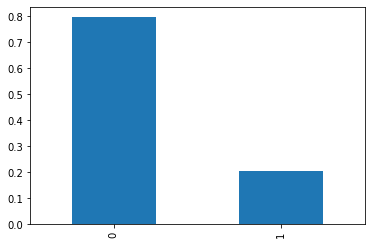

In [17]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Узнаем из данных, что 20 % клиентов ушли из банка. Проанализируем частоты классов в результатах предсказаний решающего дерева.

0    0.7925
1    0.2075
dtype: float64


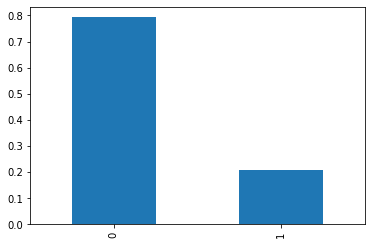

In [18]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(train_features, train_target)
valid_predicted = pd.Series(model.predict(valid_features))
class_frequency = valid_predicted.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Мало, что изменилось. Создадим константную модель: любому объекту она прогнозирует класс «0». Сохраним её предсказания в переменной target_pred_constant. Напечатаем на экране значение accuracy.

In [19]:
target_pred_constant = pd.Series ([0] * len(target)) 
print(accuracy_score(target, target_pred_constant)) 

0.7963


Значение accuracy_score не поменялось. Классы несбалансированны, когда их соотношение далеко от 1:1. Баланс классов наблюдается, если их количество примерно равно.

Создадим модель RandomForestClassifier и обучим ее с учетом дисбаланса.

In [20]:
model = RandomForestClassifier(random_state=12345)
model.fit(train_features, train_target)

predicted_valid = model.predict(valid_features)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_rfc = roc_auc_score(valid_target, probabilities_one_valid)
f1_rfc = f1_score(valid_target, predicted_valid)

print("auc_roc:", auc_roc_rfc)
print("F1:", f1_rfc)

auc_roc: 0.8388819494431977
F1: 0.584070796460177


Создадим модель DecisionTreeClassifier и обучим ее с учетом дисбаланса.

In [21]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(train_features, train_target)

predicted_valid = model.predict(valid_features) 
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_dtc = roc_auc_score(valid_target, probabilities_one_valid)
f1_dtc =  f1_score(valid_target, predicted_valid)

print("auc_roc:", auc_roc_dtc)
print("F1:", f1_dtc)

auc_roc: 0.6743069459650736
F1: 0.4849939975990396


Создадим модель LogisticRegression и обучим ее с учетом дисбаланса.

In [22]:
model = LogisticRegression(random_state=12345)
model.fit(train_features, train_target)

predicted_valid = model.predict(valid_features)   
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_lr = roc_auc_score(valid_target, probabilities_one_valid)
f1_lr=  f1_score(valid_target, predicted_valid)

print("auc_roc:", auc_roc_lr)
print("F1:", f1_lr)

auc_roc: 0.7576140673485807
F1: 0.3276450511945393


Попробуем увеличить выборку модели случайного леса с помощью функции upsample, т.к данных в датафрейме немного. Улучшим модель и посчитаем метрики f1, auc_roc после балансирования данных.

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(train_features, train_target, 5)

Увеличим выборку модели RandomForestClassifier с помощью функции upsample для борьбы с дисбалансом данных. Посчитаем метрики f1, auc_roc после балансирования данных.

In [24]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)

    
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_rfc_up = roc_auc_score(valid_target, probabilities_one_valid)
f1_rfc_up = f1_score(valid_target, predicted_valid)
print("auc_roc:", auc_roc_rfc_up)
print("F1:", f1_rfc_up)

auc_roc: 0.8373568676316697
F1: 0.5978552278820375


Метрика немного улучшилась. Увеличим выборку модели DecisionTreeClassifier с помощью функции upsample для борьбы с дисбалансом данных. Посчитаем метрики f1, auc_roc после балансирования данных.

In [25]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)

    
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_dtc_up = roc_auc_score(valid_target, probabilities_one_valid)
f1_dtc_up = f1_score(valid_target, predicted_valid)
print("auc_roc:", auc_roc_dtc_up)
print("F1:", f1_dtc_up)

auc_roc: 0.6784156691003455
F1: 0.4926829268292684


Метрика немного улучшилась. Увеличим выборку модели LogisticRegression с помощью функции upsample для борьбы с дисбалансом данных. Посчитаем метрики f1, auc_roc после балансирования данных.

In [26]:
model = LogisticRegression(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)

    
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_lr_up = roc_auc_score(valid_target, probabilities_one_valid)
f1_lr_up = f1_score(valid_target, predicted_valid)
print("auc_roc:", auc_roc_lr_up)
print("F1:", f1_lr_up)

auc_roc: 0.7629401339229007
F1: 0.4873949579831933


Метрика значительно улучшилась. 

В результате анализа баланса классов выясняли, что 

- классы не сбалансированы
- увеличили выборку для баланса 
- сбалансировали классы и увеличили метрику
  

## 4.Построение моделей 
<a id="models"></a>

Подберем параметры для моделей с помощью функции GridSearchCV. Построим модели с подобранными параметрами и сбалансированными классами.

Подберем параметры для модели RandomForestClassifier.

In [27]:
RFC = RandomForestClassifier(random_state=12345)
parametrs = { 'n_estimators': range (1, 51, 10),
              'max_depth': range (1,13, 2),'class_weight': ['balanced', None]}
grid_rfc = GridSearchCV(RFC, parametrs, scoring = "f1", cv=5)
grid_rfc.fit(train_features, train_target)
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)


{'class_weight': 'balanced', 'max_depth': 9, 'n_estimators': 41}
0.6081117491308069


Подберем параметры для модели DecisionTreeClassifier.

In [28]:
DTС = DecisionTreeClassifier(random_state=12345)
parametrs = {'max_depth': range (1,15,2), 'criterion':['gini', 'entropy', 'log_loss'],'class_weight': ['balanced', None]}
grid_dtc = GridSearchCV(DTС, parametrs,scoring = "f1", cv=5)
grid_dtc.fit(train_features, train_target)
print(grid_dtc.best_params_)
print(grid_dtc.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 7}
0.5720590860490296


Подберем параметры для модели LogisticRegression.

In [29]:
LR = LogisticRegression(random_state=12345)
parametrs = {'C': [0.1, 1, 10,100,1000],
          'class_weight': ['balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr = GridSearchCV(LR, parametrs, scoring = 'f1',  cv=5)
grid_lr.fit(train_features, train_target)
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
0.4957786467913565


Построим модель RandomForestClassifier с подобранными параметрами.

In [30]:
model = RandomForestClassifier(random_state=12345, **grid_rfc.best_params_)
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(valid_features)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_rfc_best = roc_auc_score(valid_target, probabilities_one_valid)
f1_rfc_best = f1_score(valid_target, predicted_valid)

print("auc_roc:", auc_roc_rfc_best)
print("F1:", f1_rfc_best)

auc_roc: 0.8511241902019732
F1: 0.6270833333333334


Построим модель DecisionTreeClassifier с подобранными параметрами.

In [31]:
model = DecisionTreeClassifier(random_state=12345, **grid_dtc.best_params_)
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(valid_features)  
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_dtc_best = roc_auc_score(valid_target, probabilities_one_valid)
f1_dtc_best = f1_score(valid_target, predicted_valid)

print("auc_roc:", auc_roc_dtc_best)
print("F1:", f1_dtc_best)

auc_roc: 0.8007518796992483
F1: 0.5333333333333333


Построим модель LogisticRegression с подобранными параметрами.

In [32]:
model = LogisticRegression(random_state=12345, **grid_lr.best_params_)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)

    
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
 
auc_roc_lr_best = roc_auc_score(valid_target, probabilities_one_valid)
f1_lr_best = f1_score(valid_target, predicted_valid)
print("auc_roc:", auc_roc_lr_best)
print("F1:", f1_lr_best)

auc_roc: 0.7630732099758648
F1: 0.48835202761000857


## Тестирование модели

Протестируем лучшую модель RandomForestClassifier с самыми высокими показателями метрик F1, ROC AUC. Распечатаем значения метрики F1 и ROC AUC на тестовой модели.

In [33]:
model = RandomForestClassifier(random_state=12345, **grid_rfc.best_params_)
model.fit(features_upsampled, target_upsampled)
test_predicted = model.predict(test_features)
print(f1_score(test_target, test_predicted))

0.6074380165289257


Удалось довести метрику до требуемого результата. 
Выведем значения метрики ROC AUC на тестовой модели.

In [34]:
probabilities_test = model.predict_proba(test_features)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(test_target, probabilities_one_test)
print(auc_roc)

0.8532090287240788


Неплохие значения. Построим ROC-кривую.

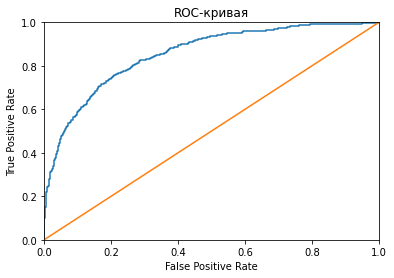

In [35]:
fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.show()

По графику видно, что наша модель значительно отличается от случайной. Рассмотрим какие факторы важны при моделировании.

In [36]:
model.feature_importances_

array([0.06214006, 0.34037515, 0.03351393, 0.10448622, 0.22226844,
       0.01007211, 0.06619832, 0.06566595, 0.06089464, 0.00661972,
       0.02776546])

Выведем график важности факторов.

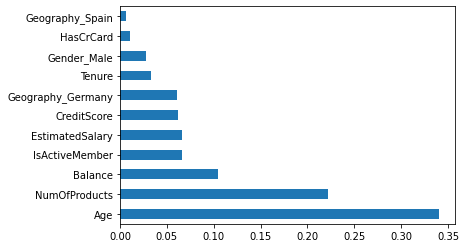

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Среди самых важных признаков, оказывающих наибольшее влияние на целевую переменную: 
- возраст клиента
- количество продуктов банка 
- баланс счета 

## 5. Вывод:
<a id="conclusion"></a>

Соберем все метрики в итоговую таблицу и подведем результат.

In [38]:
results = {
    'Model' : ['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression'],
    'f1_no_balance' :pd.Series([f1_rfc, f1_dtc, f1_lr]),
'f1_balance' :pd.Series([f1_rfc_up,f1_dtc_up, f1_lr_up]),
'f1_best' :pd.Series([f1_rfc_best,f1_dtc_best, f1_lr_best]),
'auc_roc' :pd.Series([auc_roc_rfc_best,auc_roc_dtc_best, auc_roc_lr_best])}
results = pd.DataFrame(data=results)
results

,Model,f1_no_balance,f1_balance,f1_best,auc_roc
0,RandomForestClassifier,0.584071,0.597855,0.627083,0.851124
1,DecisionTreeClassifier,0.484994,0.492683,0.533333,0.800752
2,LogisticRegression,0.327645,0.487395,0.488352,0.763073


В результате проектной работы: 
- изучили и обработали данные;
- выяснили, что классы несбалансированны;
- сбалансировали данные (увеличение выборки, изменение значения порога, балансирование веса классов;
- улучшили метрики F1 для всех моделей;
- измерили метрики ROC AUC у моделей;
- выявили, что наилучшая модель RandomForestClassifier (наивысшие показатели F1, ROC AUC);
- протестировали модель RandomForestClassifier;
- достигли F1-меры не менее 0.59;